# Creating a convex hull and extracting some data

This example takes data from our private group database, creates a compositional phase diagram, then extracts it into a matador-agnostic format.

In [1]:
%matplotlib inline
from matador.query import DBQuery
from matador.hull import QueryConvexHull

Loading settings from /home/mevans/.matadorrc
2324 results found for query in repo.
Creating hull from structures in query results.

Finding the best calculation set for hull...
     component veil     : matched 1253 structures.	-> PBE 800.0 eV, xxx eV/A, 0.03 1/A.
       siege toys       : matched 1070 structures.	-> PBE 400.0 eV, 0.05 eV/A, 0.04 1/A.
     comprise toad      : matched 1070 structures.	-> PBE 400.0 eV, 0.05 eV/A, 0.05 1/A.
     furlough road      : matched 1253 structures.	-> PBE 800.0 eV, xxx eV/A, 0.03 1/A.
     sanctity toys      : matched 1253 structures.	-> PBE 800.0 eV, xxx eV/A, 0.03 1/A.
Composing hull from set containing component veil
────────────────────────────────────────────────────────────
Scanning for suitable Na chemical potential...
Using irreducible tomatoes as chem pot for Na
────────────────────────────────────────────────────────────
Scanning for suitable P chemical potential...
Using personage daughter as chem pot for P
──────────────────────────

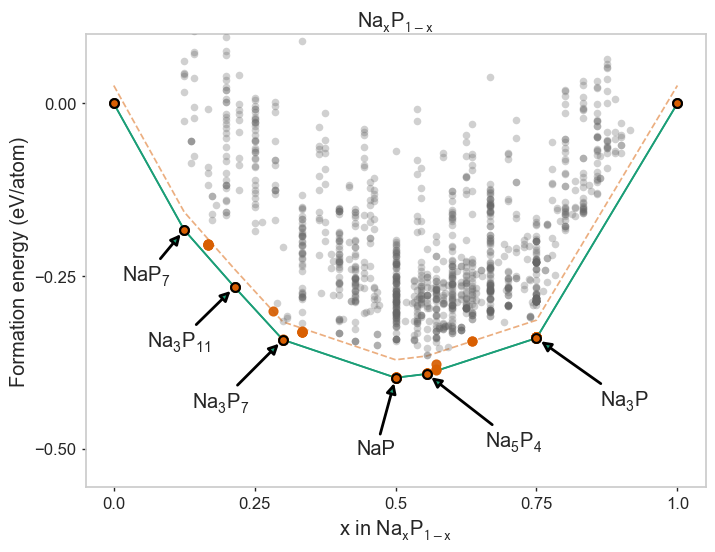

In [2]:
query = DBQuery(
    composition='NaP',
    summary=True,
    subcmd='hull',
)
hull = QueryConvexHull(
    query, 
    no_plot=False,
    hull_cutoff=26e-3,
    summary=True,
    labels=True,
)

Voltage data:

# Na into P
# Average voltage: 0.45 V
# Q (mAh/g)  	Voltage (V)
      0.00 	1.46589125
    123.62 	1.46589125
    236.01 	0.99442375
    370.87 	0.96562208
    865.37 	0.53491063
   1081.71 	0.34735000
   2596.10 	0.27326571
       nan 	0.00000000


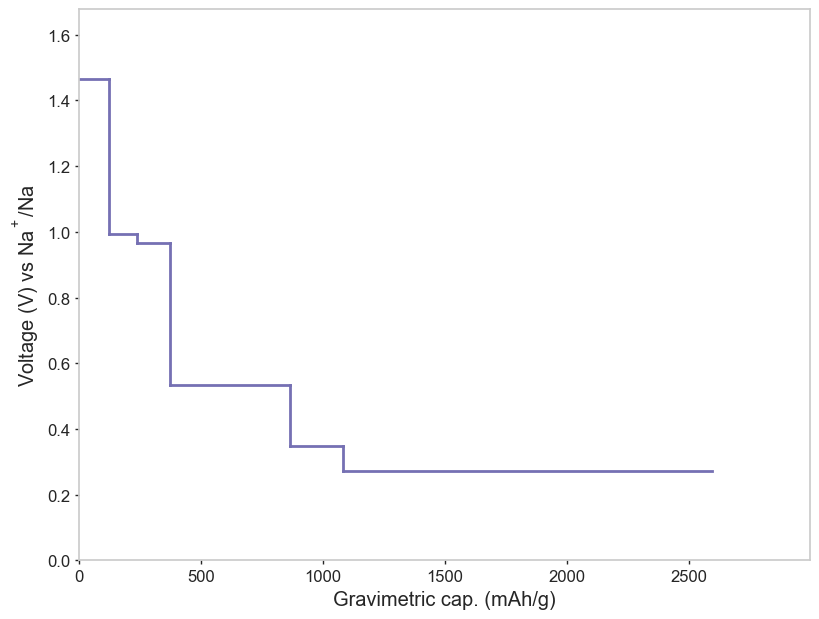

In [3]:
hull.voltage_curve()
hull.plot_voltage_curve(labels=False)

In [4]:
# see what keys are available in each structure
print(hull.hull_cursor[0].keys())

dict_keys(['_id', 'task', 'total_energy_per_atom', 'spin_polarized', 'cut_off_energy', 'enthalpy', 'species_pot', 'geom_method', 'tags', 'space_group', 'metals_method', 'total_energy', 'elems', 'source', 'kpoints_mp_spacing', 'text_id', 'icsd', 'stoichiometry', 'lattice_cart', 'lattice_abc', 'user', 'quality', 'num_fu', 'geom_stress_tol', 'atom_types', 'pressure', 'cell_volume', 'num_atoms', 'enthalpy_per_atom', 'external_pressure', 'positions_frac', 'xc_functional', 'ratios', 'enthalpy_per_b', 'num_a', 'num_chempots', 'concentration', 'formation_enthalpy_per_atom', 'formation_enthalpy', 'hull_distance', 'cell_volume_per_b', 'gravimetric_capacity'])


In [5]:
from matador.utils.cursor_utils import get_array_from_cursor
# here we grab the first element of the concentration array, which only contains 1 element for a binary system
concentrations = get_array_from_cursor(hull.hull_cursor, ['concentration', 0])
formation_enthalpy = get_array_from_cursor(hull.hull_cursor, 'formation_enthalpy_per_atom')
hull_distances = get_array_from_cursor(hull.hull_cursor, 'hull_distance')

for conc, eform, hdist in zip(concentrations, formation_enthalpy, hull_distances):
    print(f"{conc:12.4f} {eform:12.4f} {1000*hdist:12.4f}")

      0.0000       0.0000       0.0000
      0.1250      -0.1832       0.0000
      0.1667      -0.2049      16.9654
      0.1667      -0.2048      17.0896
      0.1667      -0.2047      17.1937
      0.1667      -0.2040      17.8146
      0.1667      -0.2040      17.8225
      0.1667      -0.2040      17.8500
      0.2143      -0.2660       0.0000
      0.2143      -0.2655       0.5179
      0.2821      -0.3013      25.0358
      0.3000      -0.3423       0.0000
      0.3000      -0.3423       0.0700
      0.3000      -0.3422       0.0900
      0.3000      -0.3420       0.3225
      0.3000      -0.3419       0.4525
      0.3333      -0.3314      20.1031
      0.3333      -0.3311      20.3548
      0.3333      -0.3311      20.4081
      0.3333      -0.3306      20.9148
      0.3333      -0.3301      21.4181
      0.5000      -0.3974       0.0000
      0.5000      -0.3973       0.0125
      0.5000      -0.3973       0.0187
      0.5000      -0.3973       0.0438
      0.5000      -0.3973